In [ ]:
import os
os.getcwd()

### Import the JSON file

In [3]:
import json
import pandas as pd

with open('ultimate_data_challenge.json') as f:
  data = json.load(f)
with open('logins.json') as g:
  logins_data = json.load(g)
print(data[0], logins_data)

{'city': "King's Landing", 'trips_in_first_30_days': 4, 'signup_date': '2014-01-25', 'avg_rating_of_driver': 4.7, 'avg_surge': 1.1, 'last_trip_date': '2014-06-17', 'phone': 'iPhone', 'surge_pct': 15.4, 'ultimate_black_user': True, 'weekday_pct': 46.2, 'avg_dist': 3.67, 'avg_rating_by_driver': 5.0} {'login_time': ['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21', '1970-01-01 20:21:41', '1970-01-01 20:12:16', '1970-01-01 20:35:47', '1970-01-01 20:35:38', '1970-01-01 20:47:52', '1970-01-01 20:26:05', '1970-01-01 20:31:03', '1970-01-01 20:34:46', '1970-01-01 20:36:34', '1970-01-01 20:39:25', '1970-01-01 20:40:37', '1970-01-01 20:34:58', '1970-01-01 20:43:59', '1970-01-01 20:47:46', '1970-01-01 20:46:34', '1970-01-01 20:56:07', '1970-01-01 20:49:12', '1970-01-01 20:59:06', '1970-01-01 20:59:59', '1970-01-01 21:15:01', '1970-01-01 21:09:24', '1970-01-01 21:19:24', '1970-01-01 21:20:53', '1970-01-01 21:29:19', '1970-01-01 21:58:

#### Part 1 ‑ Exploratory data analysis

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

In [4]:
data[0].keys()

dict_keys(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])

In [5]:
with open('logins.json') as g:
  logins_data = json.load(g)

In [6]:
len(logins_data['login_time']), len(data)

(93142, 50000)

here we can see that there is 93142 inputs for our "login data" and 50000 inputs from our users. we will have to delve in deeper in order to find the reason for the inconsistency

In [7]:
import pandas as pd
logins_data = pd.DataFrame(logins_data)


In [8]:
logins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [9]:
logins_data['login_time'] = pd.to_datetime(logins_data['login_time'])

In [15]:
logins_data.index = logins_data['login_time']

In [17]:
logins_data.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

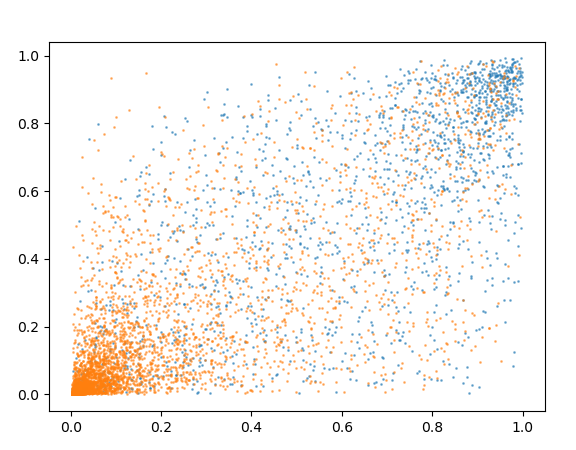

In [21]:
logins_data = logins_data.resample('15min')

In [24]:
print(logins_data)

DatetimeIndexResampler [freq=<15 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]


<bold>1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?</bold>

In my opinion the key measure of success would be to increase the average rating for the driver and percentage weekend use, since that seems to be the only time where two cities are actually active at the same time so drivers from one city could actually find work in the other city

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

        a. how you will implement the experiment 

        b. what statistical test(s) you will conduct to verify the significance of the observation 

        c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

The most important factor would be the happiness of the clients which would be reflected in the number of trips taken and the percentage change in the average ratings given to drivers.

a- The data being gathered gives us enough information about the percentage change in the number and duration of trips given and the change in customer satisfaction through driver rating

b- Regression modelling of the percentage change in the mentioned feature space plus mean squared testing would be sufficient to satisfy our requirements

c- I would summarize the "satisfaction" into driver rating * duration gone up or down, then run a predictive model based on my assumptions and check them with data gathered over a period of lets say 6 month in order to see the change in client behaviour vs our prediction. If driver satisfaction has actually gone up based on the defined goals in the timeline and treshold specied, then we would recomment that it is worth it to keep going with the current method. if the percentage change is not to our satisfaction(similar or lower than before the start) then we would recommend stopping the experiment.

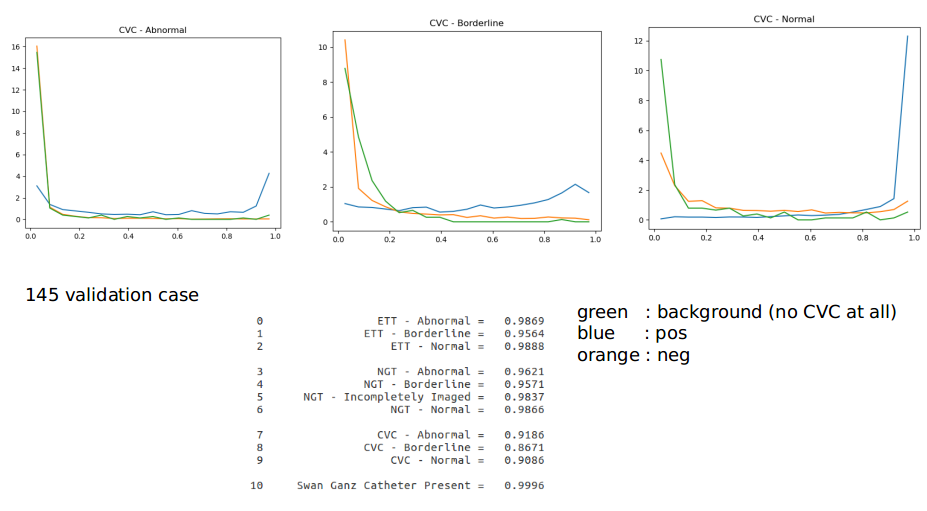